In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [32]:
movies = pd.read_csv("C:\\Users\\Dell\\Documents\\Movie_metadata\\movie_metadata.csv")
movies.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [33]:
movies.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [37]:
movies.fillna(value=0, axis=1, inplace=True)
movies.shape

(5043, 28)

In [38]:
movies.isnull().sum()

color                        0
director_name                0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
gross                        0
genres                       0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
facenumber_in_poster         0
plot_keywords                0
movie_imdb_link              0
num_user_for_reviews         0
language                     0
country                      0
content_rating               0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
aspect_ratio                 0
movie_facebook_likes         0
dtype: int64

Text(0.5, 1.0, 'Correlation Heatmap of Movie Metadata')

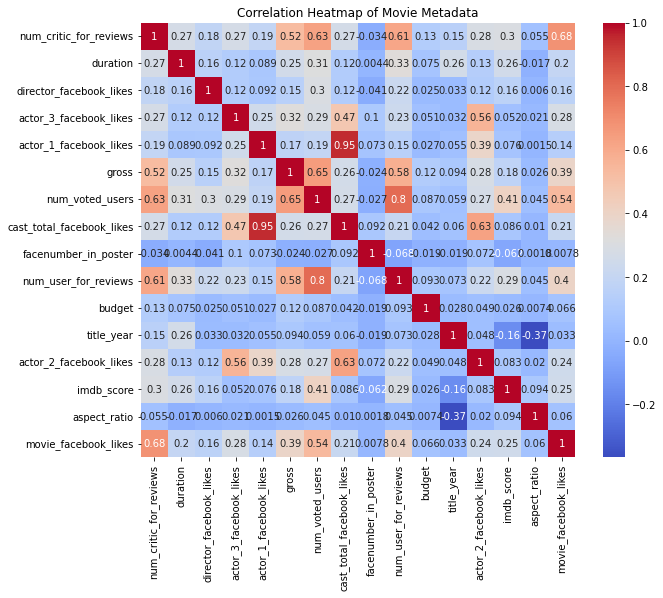

In [44]:
plt.figure(figsize=(10,8))
sns.heatmap(movies.corr(), vmax=1, square=True, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Movie Metadata')

In [47]:
#Categorical columns
cat_col = [col for col in movies.columns if movies[col].dtype== 'object']
print('Categorical columns  :' , cat_col)

print("------------------------------------------------------------------------------------")
#Numerical columns

num_col = [col for col in movies.columns if movies[col].dtype!= 'object']
print('Numerical columns  :', num_col)

Categorical columns  : ['color', 'director_name', 'actor_2_name', 'genres', 'actor_1_name', 'movie_title', 'actor_3_name', 'plot_keywords', 'movie_imdb_link', 'language', 'country', 'content_rating']
------------------------------------------------------------------------------------
Numerical columns  : ['num_critic_for_reviews', 'duration', 'director_facebook_likes', 'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross', 'num_voted_users', 'cast_total_facebook_likes', 'facenumber_in_poster', 'num_user_for_reviews', 'budget', 'title_year', 'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio', 'movie_facebook_likes']


In [48]:
#Defining features and target for this dataset based on co-relation

features = ['actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross',
       'num_voted_users', 'cast_total_facebook_likes', 'facenumber_in_poster',
       'num_user_for_reviews', 'budget', 'title_year',
       'actor_2_facebook_likes', 'aspect_ratio',
       'movie_facebook_likes']
target = ['imdb_score']

In [51]:
#splitting data set into training and test data set in 0.7/0.3

train, test = train_test_split(movies, test_size=0.30)
train.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
3640,Color,Peter Cattaneo,47.0,107.0,11.0,419.0,Olivia Williams,773.0,54606.0,Comedy|Crime|Romance,...,34.0,English,UK,PG-13,6000000.0,2001.0,766.0,6.2,2.35,30
463,Color,Albert Hughes,325.0,118.0,117.0,10000.0,Mila Kunis,18000.0,94822707.0,Action|Adventure|Drama|Thriller,...,560.0,English,USA,R,80000000.0,2010.0,15000.0,6.9,2.35,20000
679,Color,Paul W.S. Anderson,230.0,111.0,545.0,805.0,Max Ryan,26000.0,36064910.0,Action|Sci-Fi|Thriller,...,211.0,English,USA,R,45000000.0,2008.0,872.0,6.4,2.35,0
3321,Color,André Téchiné,66.0,105.0,25.0,98.0,Ronit Elkabetz,963.0,2874.0,Drama,...,14.0,French,France,Unrated,0.0,2009.0,168.0,6.0,2.35,120
3651,Color,David Cronenberg,179.0,89.0,0.0,15.0,Leslie Carlson,391.0,0.0,Horror|Mystery|Sci-Fi|Thriller,...,228.0,English,Canada,R,5952000.0,1983.0,20.0,7.3,1.85,0


In [55]:
#Fill the training and test data with require information

X_train = train[features].dropna()
y_train = train[target].dropna()
X_test = test[features].dropna()
y_test = test[target].dropna()

In [59]:
from sklearn import linear_model # compute classification accuracy for the linear regression model
from sklearn import metrics # for the check the error and accuracy of the model

lin = linear_model.LinearRegression()
# train the model on the training set
lin.fit(X_train, y_train)

LinearRegression()

In [60]:
lin_score_train = lin.score(X_test, y_test)
lin_score_test = lin.score(X_train, y_train)

In [61]:
print("training_score :", lin_score_train)
print("testing_score :" , lin_score_test)

training_score : 0.23260333723207072
testing_score : 0.22348418990131158


In [62]:
from sklearn import neighbors
n_neighbors = 5
knn= neighbors.KNeighborsRegressor(n_neighbors, weights= 'uniform')
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [63]:
knn_score_train = knn.score(X_train, y_train)
knn_score_test = knn.score(X_test, y_test)

In [67]:
print("Training score :", knn_score_train)
print("Test score :", knn_score_test)

Training score : 0.32687601593187066
Test score : -0.07835434980042932
